In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp
%matplotlib inline
sns.set()

In [2]:
data1 = pd.read_csv('ex2data1.txt', header = None, names = ['exam1', 'exam2', 'y'])
data1['ones'] = pd.Series(np.ones(100), dtype = int)
data1 = data1[['ones', 'exam1', 'exam2', 'y']]
X = np.array(data1.iloc[:, 0:3])
y = np.array(data1.iloc[:, 3:])

In [3]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data.iloc[:, 3] == 0
    pos = data.iloc[:, 3] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos].iloc[:, 1], data[pos].iloc[:, 2], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    axes.scatter(data[neg].iloc[:, 1], data[neg].iloc[:, 2], c = 'b', s = 50, label = label_neg)
    plt.xlim(25, 110)
    plt.ylim(25, 110)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

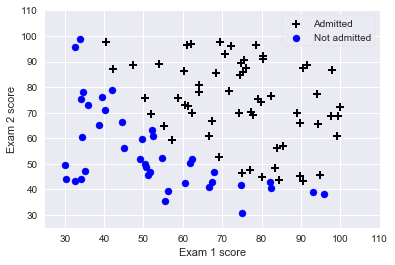

In [4]:
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [5]:
def gFunction(z):
    return 1 / (1 + np.exp(-z))

In [6]:
def hFunction(theta, X):
    theta = np.array(theta).T
    h = np.array(gFunction(np.dot(X, theta)))
    return h

In [7]:
def costFunction(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    j = (-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))
    return j
    
costFunction([0, 0, 0], X, y)

array([ 0.69314718])

In [8]:
def gradientDescent(theta, X, y):
    m = y.size
    h = hFunction(theta, X).reshape(100, 1)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient.flatten()

gradientDescent([0, 0, 0], X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [9]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradientDescent(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [21]:
def optimizer(costFunction, theta, X, y, gradientDescent):
    optimum = sc.optimize.minimize(costFunction, theta, args = (X, y), method = None, jac = gradientDescent, options={'maxiter' : 400})
    return optimum

optimum = optimizer(costFunction, initial_theta, X, y, gradientDescent)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.2034977015894438
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476822e-09,  -9.31921318e-07,  -2.82608930e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [31]:
def predict(theta, exam1, exam2):
    x = np.array([1, exam1, exam2])
    predict = hFunction(optimum.x, x)
    print(1) if predict >= 0.5 else print(0)
    return predict

predict(optimum.x, 45, 85)

1


array(0.7762907240588947)

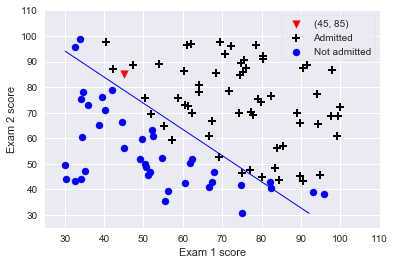

In [35]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = gFunction(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimum.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')